<a href="https://colab.research.google.com/github/hitenmewada/Capstone-1-EDA_on_hotel_booking_dataset/blob/main/Team_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

Hotel Booking Analysis: This project dataset consist of the booking details of two hotels, viz. City Hotel & Resort Hotel from year 2015 to 2017. The main objective of this project is to do the Exploratory Data Analysis from hotel point of view so that the executives of the hotels could make and ammend their policies accordingly. 

This project analyses and visualizes the dataset in five segments:

   1. Examining the guest distribution
   2. Exploring the bookings
   3. Inspecting the hotel traffic
   4. Scanning special requests & amenities
   5. Study on average daily rates


# Exploring and cleaning of dataframe

In [ ]:
# importing library's and modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [ ]:
# connecting to drive for data set 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# storing the dataset in to variable 
file_path = '/content/drive/MyDrive/Colab Notebooks/Week 6: Capstone Project: EDA/Copy of Hotel Bookings.csv'
hotel_df = pd.read_csv(file_path)

In [ ]:
# seting the columns display size to 36
pd.set_option ("display.max_columns", 36)

In [ ]:
# exploring dataset
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# displaying top 5 rows
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# displaying 5 bottom rows
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
# exploring columns 
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
hotel_df.shape

(119390, 32)

In [ ]:
# observing information about dataset 
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            



# Examining the guest distribution

In this segment we will focus on the guests and find out the following:

   1. Types of customers w.r.t the hotels.
   2. The ratio of new customers & repeated customers.
   3. Customers from different  countries.
   4. The ratio of changes in bookings



In [ ]:
# Finding null values
null_values = hotel_df.isnull().sum().sort_values(ascending=True)

In [ ]:
null_values[null_values>0]

children         4
country        488
agent        16340
company     112593
dtype: int64

In [ ]:
# Filling the missing values
hotel_df['children'] = hotel_df['children'].fillna(0)
hotel_df['country'] = hotel_df['country'].fillna(0)
hotel_df['agent'] = hotel_df['agent'].fillna(0)
hotel_df['company'] = hotel_df['company'].fillna(0)

* Types of customers w.r.t the hotels

In [ ]:
# Grouping types of customers with respect to both the hotels
types_of_customers = hotel_df.groupby(['hotel','customer_type'])['hotel'].count().unstack()

In [ ]:
types_of_customers

customer_type,Contract,Group,Transient,Transient-Party
hotel,,,,
City Hotel,2300,293,59404,17333
Resort Hotel,1776,284,30209,7791


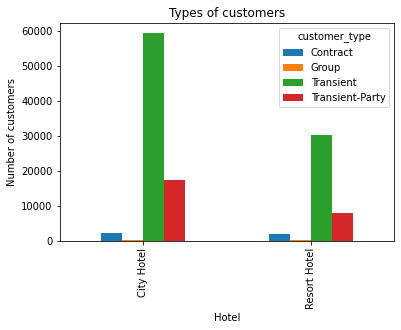

In [ ]:
# Creating a Bar Plot for representing the types of customers for both the hotels
types_of_customers.plot(kind='bar')

plt.title('Types of customers')
plt.ylabel('Number of customers')
plt.xlabel('Hotel')

# Fixing the size of the plot
plt.rcParams['figure.figsize'] = (10,10)

INFERENCE:

From the above bar plot we find that both the City Hotel & Resort Hotel are attracting 'Transient' type of customers the most followed by 'Transiet-Party' type. Whereas, 'Group' type of customers are the least attended by both the hotels.

* Ratio of new customers & repeated customers




In [ ]:
# Finding number of new and repeated customers
total_repeated_guests = hotel_df.groupby(['hotel','is_repeated_guest','customer_type'])['hotel'].count().unstack()

In [ ]:
total_repeated_guests

customer_type                   Contract  Group  Transient  Transient-Party
hotel        is_repeated_guest                                             
City Hotel   0                      2286    245      57786            16981
             1                        14     48       1618              352
Resort Hotel 0                      1757    171      28754             7600
             1                        19    113       1455              191

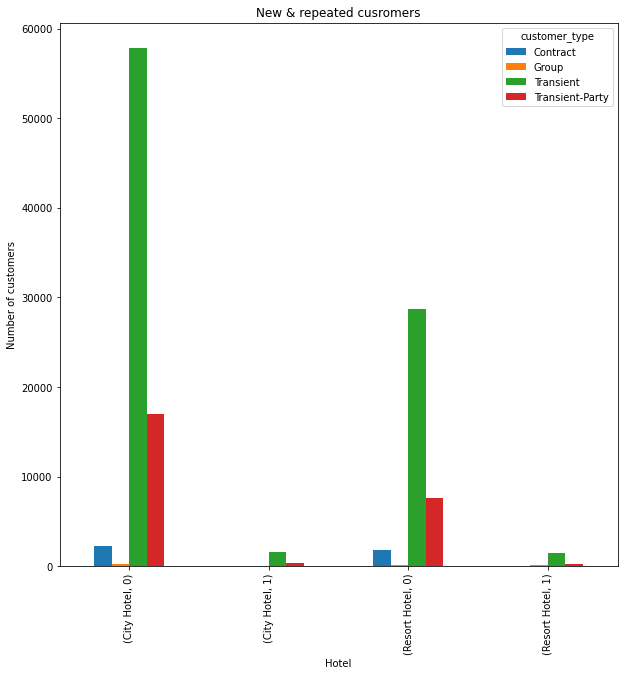

In [ ]:
# Creating a Bar Plot for representing the number of new and repeated customers for both the hotels
total_repeated_guests.plot(kind='bar')

plt.title('New & repeated cusromers')
plt.ylabel('Number of customers')
plt.xlabel('Hotel')

# Fixing the size of the plot
plt.rcParams['figure.figsize'] = (10,10)

INFERENCE:

From the above dataframe which represents the total number of repeated guests in both the hotels, we conclude that 'Transient' type of customers are most repeated in both the hotels, 'Contract' type customers being the least repeated.


* Customers from different countries

In [ ]:
# Finding the top 10 countries from where the hotels are attending most guests
top_ten_countries_customers = hotel_df['country'].value_counts().head(10)

In [ ]:
top_ten_countries_customers

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

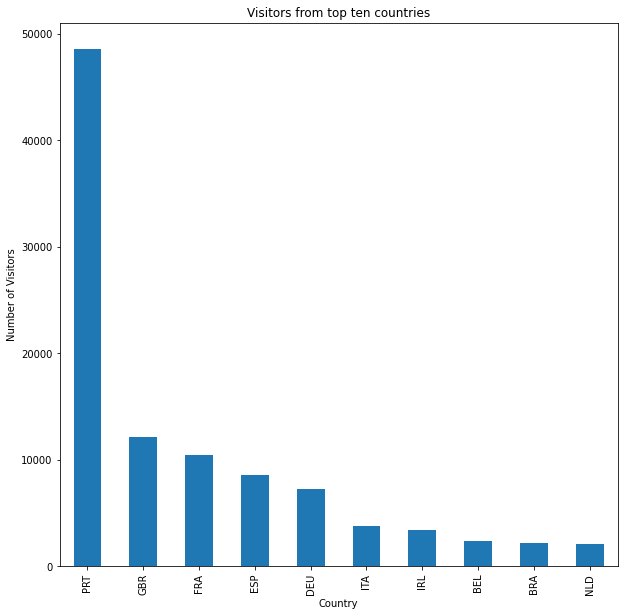

In [ ]:
# Creating a bar plot to visualize visitors from top ten countries

top_ten_countries_customers.plot(kind = 'bar')

plt.title('Visitors from top ten countries')
plt.ylabel('Number of Visitors')
plt.xlabel('Country')

# Fixing the size of the plot

plt.rcParams['figure.figsize'] = (10,10)

INFERENCE: 

The hotels are attending most guests from PTR followed by GBR & FRA.

* Change in bookings

In [ ]:
# Finding out which type of cystomers make change in booking the most
changes_in_bookings = hotel_df.groupby('customer_type')['booking_changes'].sum()

In [ ]:
changes_in_bookings

customer_type
Contract             488
Group                170
Transient          16835
Transient-Party     8907
Name: booking_changes, dtype: int64

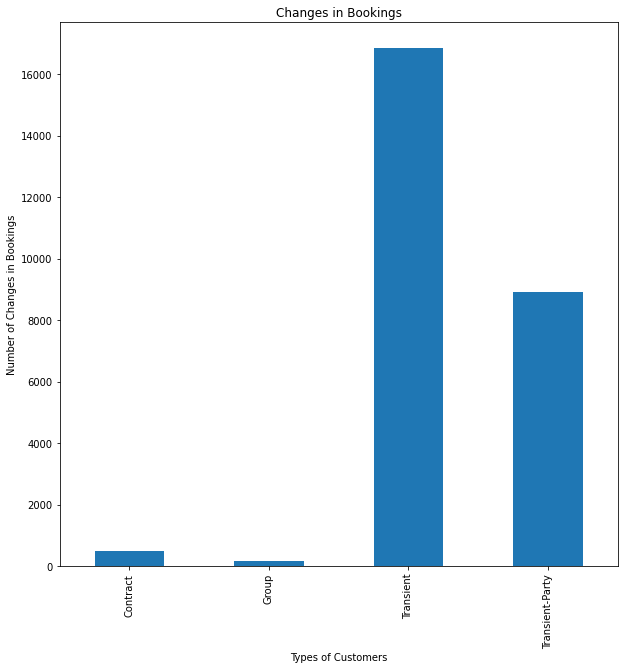

In [ ]:
# Creating a bar plot to visualize, which type of customers are making the most changes in bookings
changes_in_bookings.plot(kind='bar')

plt.title('Changes in Bookings')
plt.ylabel('Number of Changes in Bookings')
plt.xlabel('Types of Customers')

# Fixing the size of the plot
plt.rcParams['figure.figsize'] = (10,10)

INFERENCE:

Here we conclude that 'Transient' type customers are making the most changes in bookings, whereas 'Group' type customers are making the least changes in bookings.

Conclusion: 

From the above EDA of the guests distributions we come to following conclusions:

 1. Both the hotels are attending different types of guests, out of which the 'Transient' types are the most frequent for both the hotel, followed by 'Transient-Party'. 'Group' type of customers are the least attended by both the hotels.

 2. Both the hotels are attending different types of guests, out of which the 'Transient' types are the most repeated for both the hotel, followed by 'Transient-Party'. 'Group' type of customers are the least repeated guests in both the hotels.

 3. Both the hotels are attending most number of guests from PTR followed by GBR & FRA.

 4. 'Transient' types are guests are making the most changes in both the hotels, followed by 'Transient-Party'.

# Exploring the bookings 

Different Parameters where need to give attention are:

1.What is total number of canceled Bookings by hotel type?

2.What is the booking ratio between Resort Hotel and City Hotel?

3.What is total number of Cancellations through market segments?

4.What is total number of Bookings through different Distribution Channels?

 As we can see there are some columns contains null values but the columns required for bookings operations are fully non null values.So,After reading all Qs.now extracting out columns neccesary for answering the question in order to get proper insights.

---




In [ ]:
dataset = hotel_df.copy()

In [ ]:
#Extracing required columns with non null values
Column_required=dataset[["hotel","is_canceled","market_segment","distribution_channel"]]

In [ ]:
Column_required

,hotel,is_canceled,market_segment,distribution_channel
0,Resort Hotel,0,Direct,Direct
1,Resort Hotel,0,Direct,Direct
2,Resort Hotel,0,Direct,Direct
3,Resort Hotel,0,Corporate,Corporate
4,Resort Hotel,0,Online TA,TA/TO
...,...,...,...,...
119385,City Hotel,0,Offline TA/TO,TA/TO
119386,City Hotel,0,Online TA,TA/TO
119387,City Hotel,0,Online TA,TA/TO
119388,City Hotel,0,Online TA,TA/TO


In [ ]:
Column_required.shape

(119390, 4)

  1. What is total number of canceled Bookings by hotel type?


In [ ]:
dataset['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
dataset['is_canceled'].unique()

array([0, 1])

In [ ]:
 # here we grouping the columns for required data
Canceled_df= Column_required.groupby(['hotel', 'is_canceled',])['is_canceled'].count().unstack()


Here, is_canceled have two unique values:1 for booling canceled and 0 for bookings.

In [ ]:
Canceled_df

is_canceled,0,1
hotel,,
City Hotel,46228,33102
Resort Hotel,28938,11122



Now, We will plot this data to view the daigram.

Text(0, 0.5, 'Bookings and canceled values')

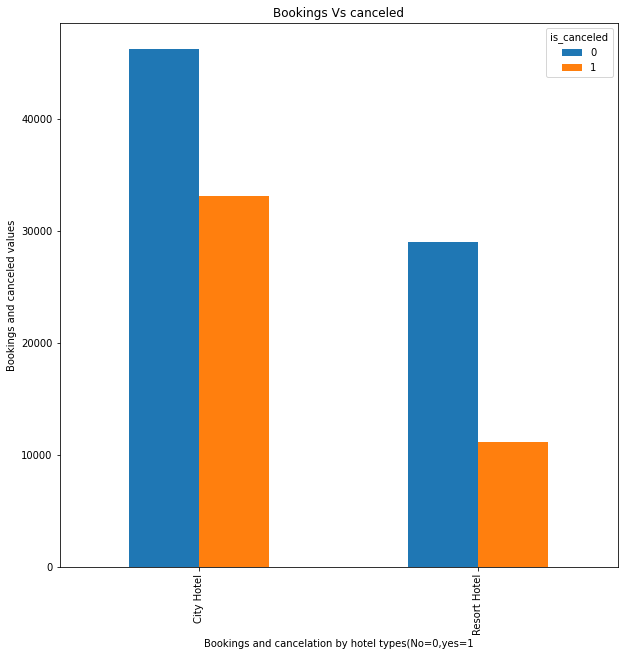

In [ ]:
# creating the plot object
Canceled_df.plot(kind = 'bar')
plt.title('Bookings Vs canceled')
plt.xlabel('Bookings and cancelation by hotel types(No=0,yes=1')
plt.ylabel('Bookings and canceled values')

From, the result We can conclude here number of Booking and cancellation are more in city hotel than resort hotel.

  2. What is the booking ratio between Resort Hotel and City Hotel?



In [ ]:
#extracting the bookings numbers from  Column_required
Booking_df = Column_required[Column_required['is_canceled'] == 0]
Booking_df

,hotel,is_canceled,market_segment,distribution_channel
0,Resort Hotel,0,Direct,Direct
1,Resort Hotel,0,Direct,Direct
2,Resort Hotel,0,Direct,Direct
3,Resort Hotel,0,Corporate,Corporate
4,Resort Hotel,0,Online TA,TA/TO
...,...,...,...,...
119385,City Hotel,0,Offline TA/TO,TA/TO
119386,City Hotel,0,Online TA,TA/TO
119387,City Hotel,0,Online TA,TA/TO
119388,City Hotel,0,Online TA,TA/TO


In [ ]:
# x,y = get_count(Booking_df['hotel'])
z = Booking_df['hotel'].value_counts()
x = z.index
y = z/z.sum()*100


In [ ]:
x.values


array(['City Hotel', 'Resort Hotel'], dtype=object)

In [ ]:
y.values

array([61.50121065, 38.49878935])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


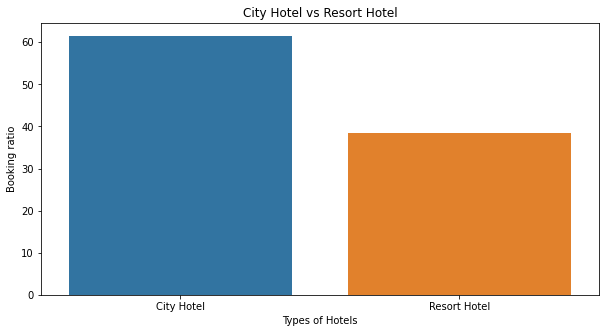

In [ ]:
# Here, we Visualizing the results of x and y by using bar plot
plt.figure(figsize=(10,5))
sns.barplot(x.values,y.values)
plt.xlabel('Types of Hotels')
plt.ylabel('Booking ratio')
plt.title('City Hotel vs Resort Hotel')
plt.show()

As a result we can see more than 60% of the people booked from the City Hotel compared to Resort Hotel.

  3. What is total number of Bookings&Cancellations through market segments?


In [ ]:
 # By grouping the columns we will get the required data
Segments_df = Column_required.groupby(['hotel', 'is_canceled',"market_segment"])['is_canceled'].count().unstack()
Segments_df

market_segment            Aviation  Complementary  Corporate  Direct  Groups  \
hotel        is_canceled                                                       
City Hotel   0               185.0          478.0     2345.0  5037.0  4352.0   
             1                52.0           64.0      641.0  1056.0  9623.0   
Resort Hotel 0                 NaN          168.0     1958.0  5635.0  3362.0   
             1                 NaN           33.0      351.0   878.0  2474.0   

market_segment            Offline TA/TO  Online TA  Undefined  
hotel        is_canceled                                       
City Hotel   0                   9574.0    24257.0        NaN  
             1                   7173.0    14491.0        2.0  
Resort Hotel 0                   6334.0    11481.0        NaN  
             1                   1138.0     6248.0        NaN

Text(0, 0.5, 'Values')

<Figure size 720x360 with 0 Axes>

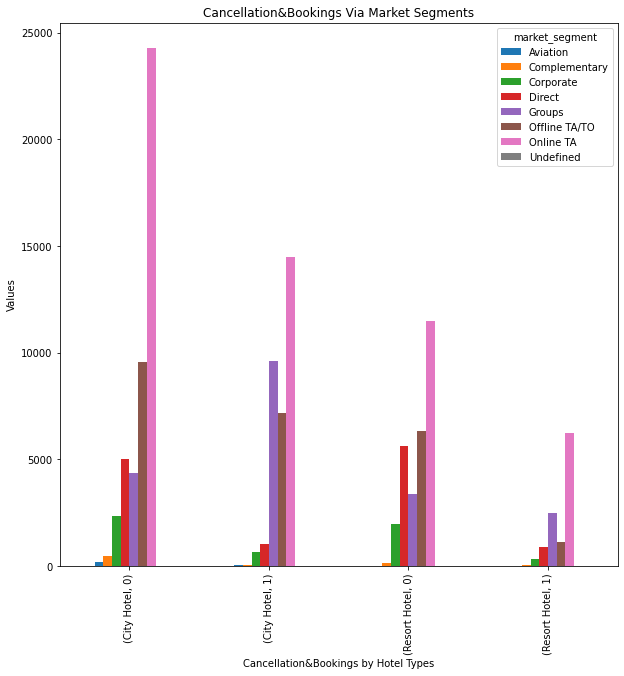

In [ ]:
#Showing the data through the daigram using matplot
plt.figure(figsize=(10,5))
Segments_df.plot(kind = 'bar')
plt.title('Cancellation&Bookings Via Market Segments')
plt.xlabel('Cancellation&Bookings by Hotel Types')
plt.ylabel('Values')

We can find the conclusion from the daigram the highest segment from where the booking and cancellation done are Online TA .

  4. What is total number of Bookings& cancellation through different Distribution Channels?


In [ ]:
 # By grouping the columns we will get Bookings done through different channels
distribution_df = Column_required.groupby(['hotel',"is_canceled", "distribution_channel"])['is_canceled'].count().unstack()
distribution_df

distribution_channel      Corporate  Direct    GDS    TA/TO  Undefined
hotel        is_canceled                                              
City Hotel   0               2622.0  5548.0  156.0  37902.0        NaN
             1                786.0  1232.0   37.0  31043.0        4.0
Resort Hotel 0               2581.0  6540.0    NaN  19816.0        1.0
             1                688.0  1325.0    NaN   9109.0        NaN

Text(0, 0.5, 'Values')

<Figure size 720x360 with 0 Axes>

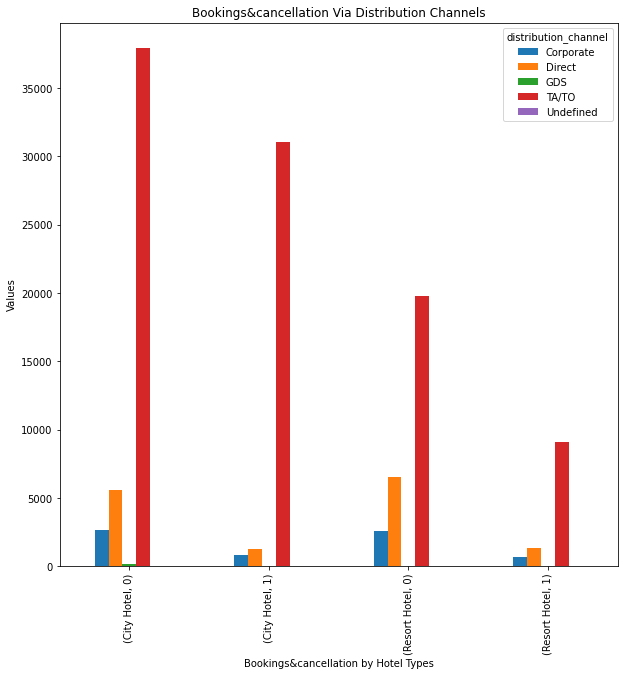

In [ ]:
# Here, we Visualizing the results by using bar plot
plt.figure(figsize=(10,5))
distribution_df.plot(kind = 'bar')
plt.title('Bookings&cancellation Via Distribution Channels')
plt.xlabel('Bookings&cancellation by Hotel Types')
plt.ylabel('Values')

From,the result we can extract the higher channels from where the bookings and cancellation done is TA/TO from City Hotel.

# Inspecting the hotel traffic
1.most busy year of hotel booking

2.most busiest month of hotel booking

3.How many guests coming from mentioned countries in Resort Hotel?

4.How many guests coming from mentioned countries in City Hotel?

5.Maximum number of stays in week nights in each hotel?

6.Maximum number of stays in weekend nights in each hotel?

In [ ]:
df = hotel_df.copy()

In [ ]:
#most busy year of hotel booking
df.arrival_date_year.agg(["value_counts"])

In [ ]:
year = [2016, 2017, 2015]
counts = df.arrival_date_year.value_counts()

plt.figure(figsize = (5, 7))
plt.pie(counts, explode = (0.1, 0.1, 0.1), labels = year, autopct = "%.2f%%", shadow = True, startangle = 90)

plt.show();


conclusion
Most busy year is 2016 followed by 2017 and 2015

In [ ]:
#most busiest month of hotel booking
most_busy_month = df.groupby(["hotel"])["arrival_date_month"].agg(["value_counts"])

In [ ]:
most_busy_month

In [ ]:
most_busy_month.plot(kind = 'bar')

plt.title('most busy month')
plt.ylabel('number of guest')
plt.xlabel('month')

Conclusion
Most busy month of city hotel is August and Most busy month of resort hotel is also August.

In [ ]:
#How many guests coming from mentioned countries in Resort Hotel?
resort_hotel_guest = df["country"][df["hotel"] == "Resort Hotel"].agg(["value_counts"]).head(10)

In [ ]:
resort_hotel_guest

In [ ]:
resort_hotel_guest.plot(kind = 'bar')

plt.title('resort hotel guest')
plt.ylabel('number of guest')
plt.xlabel('country')

Conclusion
Most guest are coming from PRT country in Resort hotel

In [ ]:
#How many guests coming from mentioned countries in City Hotel?
city_hotel_guest = df["country"][df["hotel"] == "City Hotel"].agg(["value_counts"]).head(10)

In [ ]:
city_hotel_guest

In [ ]:
city_hotel_guest.plot(kind = 'bar')

plt.title('city hotel guest')
plt.ylabel('number of guest')
plt.xlabel('country')

conclusion
Most guest are coming from PRT country in city hotel.

In [ ]:
#Maximum number of stays in week nights in each hotel?
weeknights_traffic = df.groupby(["hotel"])["stays_in_week_nights"].agg(["max"])

In [ ]:
weeknights_traffic

In [ ]:
weeknights_traffic.plot(kind = 'bar')

plt.title('weeknights traffic')
plt.ylabel('maximum stays')
plt.xlabel('hotel')

conclusion
Maximum number of stays in Resort hotel followed by city hotel.

In [ ]:
#Maximum number of stays in weekend nights in each hotel?
weekened_nights = df.groupby(["hotel"])["stays_in_weekend_nights"].agg(["max"])


In [ ]:
weekened_nights

In [ ]:
weekened_nights.plot(kind = 'bar')

plt.title('weekened nights')
plt.ylabel('maximum stays')
plt.xlabel('hotel')

conclusion
maximum number of stays in weekened nights in Resort hotel followed by city hotel.

overall conclusion
Most busy hotel is Resort hotel than city hotel,and most busy month of city hotel and resort hotel is August.


# Examining special requests and amenities:
Q 1. Finding relations between 'total of the special requests' , 'is canceled'
or 'not'.

Q 2. Finding relations between 'total of Special requests' with respect to 'customer'.

Q 3. Which type of meals are preferred by the customers.?

Q 4. Finding relations between 'required car parking spaces' with respect to 'customer'.


* Here, i will copy the original dataset so that original dataset not change.

In [ ]:
# Copy dataset
hotel_df_2 = hotel_df.copy()

* Q 1. Finding the relations between 'total of the special requests', 'is canceled' or 'not'.

In [ ]:
special_requests = hotel_df_2.groupby(['hotel', 'is_canceled','total_of_special_requests'])['is_canceled'].count().unstack()
special_requests

total_of_special_requests      0      1     2     3    4   5
hotel        is_canceled                                    
City Hotel   0             21617  16699  6403  1307  177  25
             1             26340   4721  1739   280   21   1
Resort Hotel 0             15145   9209  3700   744  127  13
             1              7216   2597  1127   166   15   1

* Plotting graph between total of the special requests and is canceled or not.

Text(0.5, 0, 'is canceled or not')

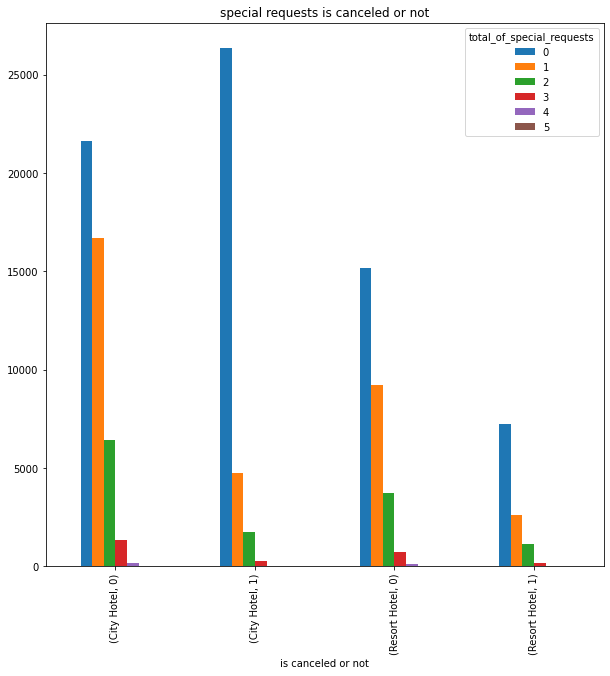

In [ ]:
special_requests.plot(kind = 'bar')
plt.title('special requests is canceled or not')
plt.xlabel('is canceled or not')

* Q 2. Finding total of Special requests with respect to customer.

In [ ]:
special_requests = hotel_df_2.groupby(['hotel', 'customer_type','total_of_special_requests'])['customer_type'].count().unstack()
special_requests

total_of_special_requests           0        1       2       3      4     5
hotel        customer_type                                                 
City Hotel   Contract           988.0    649.0   561.0    96.0    3.0   3.0
             Group              152.0     93.0    38.0     8.0    2.0   NaN
             Transient        33967.0  16912.0  6937.0  1388.0  181.0  19.0
             Transient-Party  12850.0   3766.0   606.0    95.0   12.0   4.0
Resort Hotel Contract          1118.0    472.0   150.0    32.0    3.0   1.0
             Group              162.0     84.0    30.0     6.0    1.0   1.0
             Transient        15364.0   9865.0  4115.0   736.0  119.0  10.0
             Transient-Party   5717.0   1385.0   532.0   136.0   19.0   2.0

* Plotting graph between total of special requests and customer.

Text(0.5, 0, 'customer_type')

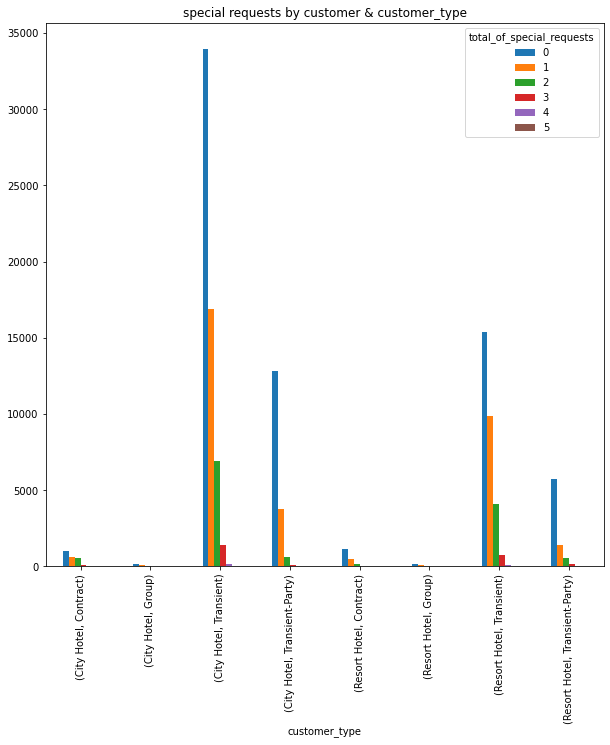

In [ ]:
special_requests.plot(kind = 'bar')
plt.title('special requests by customer & customer_type')
plt.xlabel('customer_type')

* Q 3. Which type of meals are preferred by the customers.?

In [ ]:
meal_type = hotel_df_2.groupby(['hotel', 'customer_type','meal'])['meal'].count().unstack()
meal_type

meal                               BB     FB      HB      SC  Undefined
hotel        customer_type                                             
City Hotel   Contract          2110.0    NaN    12.0   178.0        NaN
             Group              247.0    NaN     8.0    38.0        NaN
             Transient        46728.0    8.0  2735.0  9933.0        NaN
             Transient-Party  13220.0   36.0  3662.0   415.0        NaN
Resort Hotel Contract          1150.0    5.0   601.0     5.0       15.0
             Group              252.0    1.0    28.0     1.0        2.0
             Transient        23964.0  539.0  5285.0    35.0      386.0
             Transient-Party   4639.0  209.0  2132.0    45.0      766.0

* Plotting graph between meals and customer.

Text(0.5, 0, 'customer_type')

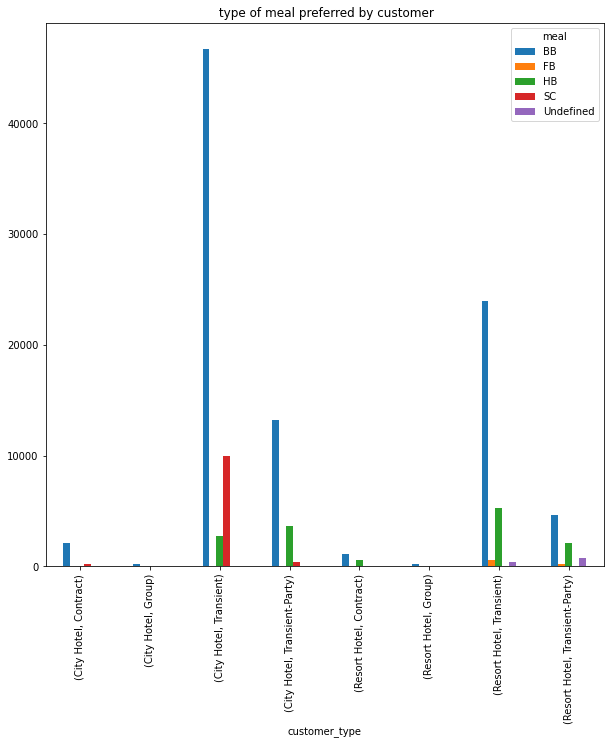

In [ ]:
meal_type.plot(kind = 'bar')
plt.title(' type of meal preferred by customer')
plt.xlabel('customer_type')

* Q 4. Finding relations between required car parking spaces with respect to customer.

In [ ]:
# Grouping required car parking spaces with customer type
car_parking_spaces = hotel_df_2.groupby(['customer_type','required_car_parking_spaces'])['customer_type'].count().unstack()

In [ ]:
car_parking_spaces

required_car_parking_spaces,0,1,2,3,8
customer_type,,,,,
Contract,3942.0,133.0,1.0,NaN,NaN
Group,526.0,51.0,NaN,NaN,NaN
Transient,83193.0,6402.0,16.0,2.0,NaN
Transient-Party,24313.0,797.0,11.0,1.0,2.0


* Plotting graph between required car parking spaces and customer type.

Text(0.5, 0, 'customer type')

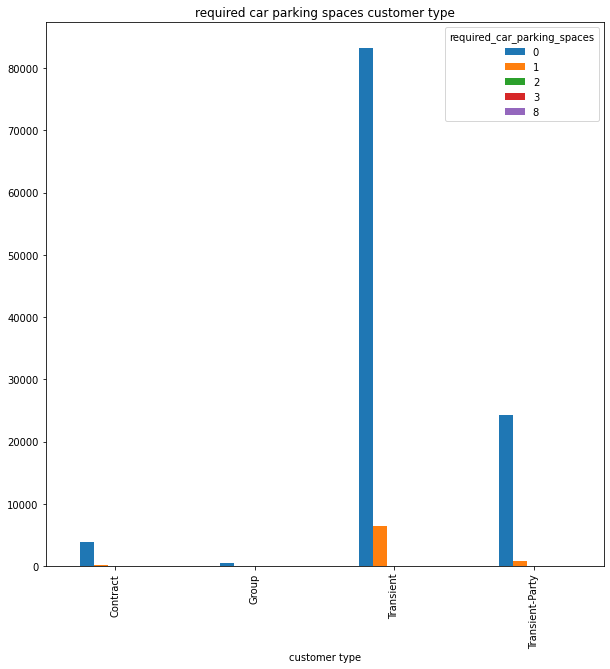

In [ ]:
car_parking_spaces.plot(kind = 'bar')
plt.title('required car parking spaces customer type')
plt.xlabel('customer type')

Inference:
### we can see that transient type of customer mostly required car parking spaces.

# Study on Average Daily Rates (ADR)
-> ADR - Average Daily Rate is the average revenue that a hotel receives for each occupied guest room per day.

  * What is the Yearly average of ADR with respect to hotel type ?
  * What is a monthly Average daily rates (adr) ?
  * How does the ADR Vary Over the Year by Hotel Type ?
  * Find out the Relationship between Average Daily Rate(ADR) and Arrival Month by Booking Cancellation Status ?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


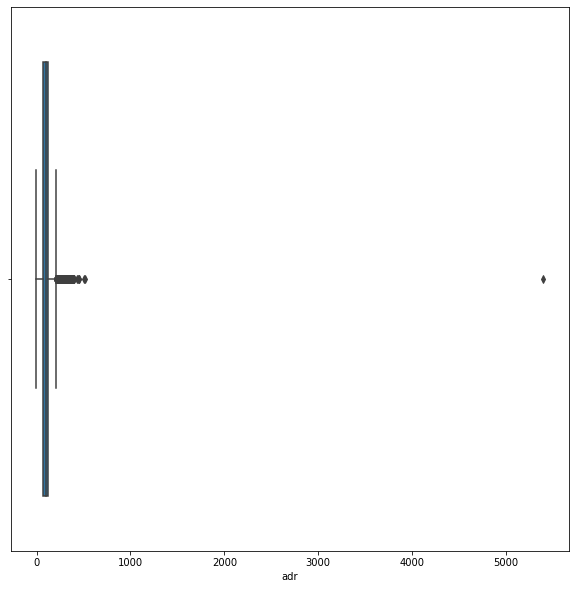

In [ ]:
# here we dealing with outliers using boxplot 
sns.boxplot(hotel_df['adr'])

As we can see we have some outliers in adr column so now we will replacing with mean value 

In [ ]:
# here we finding the outlier value
hotel_df['adr'].max()

5400.0

In [ ]:
# here we copy the original data
hotel_df_copy = hotel_df.copy()

In [ ]:
# here we replacing the outliers with mean value of adr columns
hotel_df_copy['adr']=hotel_df_copy.adr.apply(lambda x: hotel_df['adr'].mean() if x == 5400.0 else x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


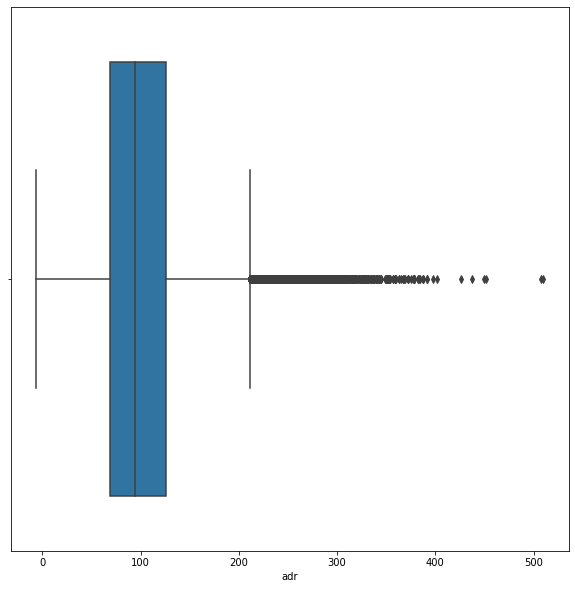

In [ ]:
# here we observing the results after replacing outlier value with mean value in to adr column
sns.boxplot(hotel_df_copy['adr'])

As we observed till now, it is that we have 2 different hotels, which are a resort hotel and a city hotel, and we have 3 years of data; 2015,2016 and 2017. After that, we checked if any null values were present in hotel, adr, is_canceled, arrival_date_year, arrival_date_month columns and we found that there were no null values present.And then we dealt with outliers from the adr column and replaced the mean value of adr column. 

Q-1 What is the Yearly average of ADR with respect to hotel type ?

In [ ]:
hotel_df_copy['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
# here we taking arrival year, month, adr by 'resort hotel' 
Resort_hotel = hotel_df_copy[(hotel_df_copy['hotel'] == 'Resort Hotel')][['arrival_date_year','arrival_date_month','adr']]

In [ ]:
# here we taking arrival year, month, adr by 'city hotel'
City_hotel = hotel_df_copy[(hotel_df_copy['hotel'] == 'City Hotel')][['arrival_date_year','arrival_date_month','adr']]

In [ ]:
# here we grouping all the values by arrival year and take average adr for resort hotel
Resort_hotel_adr_by_year = Resort_hotel.groupby('arrival_date_year')['adr'].mean().reset_index()
Resort_hotel_adr_by_year

,arrival_date_year,adr
0,2015,89.353417
1,2016,87.730762
2,2017,108.660217


In [ ]:
# here we grouping all the values by arrival year and take average adr for city hotel
City_hotel_adr_by_year = City_hotel.groupby('arrival_date_year')['adr'].mean().reset_index()
City_hotel_adr_by_year

,arrival_date_year,adr
0,2015,85.856915
1,2016,103.344769
2,2017,117.501864


In [ ]:
# here we concatenate the resort hotel adr and city hotel adr with arrival year
adr_by_year_hotel_type = pd.concat([Resort_hotel_adr_by_year['arrival_date_year'],Resort_hotel_adr_by_year['adr'],City_hotel_adr_by_year['adr']],axis=1)
adr_by_year_hotel_type.columns = ['Years','Resort Hotel adr','City Hotel adr']

In [ ]:
# here we set the index by arrival years 
adr_by_year_hotel_type.set_index('Years',inplace=True)

Text(0.5, 1.0, 'Yearly ADR by Both Hotel')

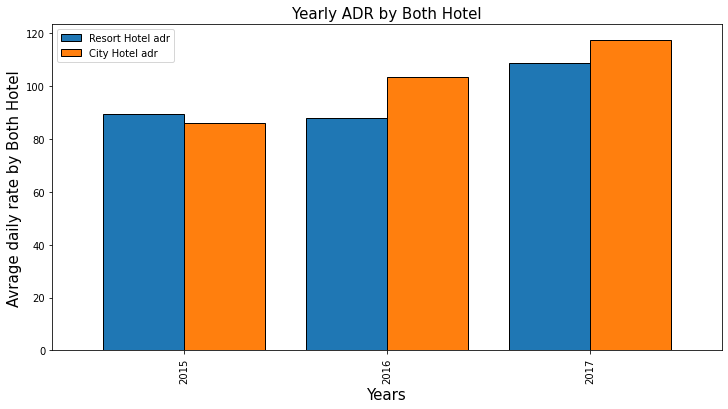

In [ ]:
# here we creating the bar plot to Visualize the results 
ax=adr_by_year_hotel_type[['Resort Hotel adr','City Hotel adr']].plot.bar( 
    width=0.8,
    linewidth=1,
    edgecolor='black',
    figsize = (12,6),
    fontsize = 10);
ax.set_xlabel('Years', fontsize = 15)
ax.set_ylabel('Avrage daily rate by Both Hotel', fontsize = 15)
ax.set_title('Yearly ADR by Both Hotel',fontsize = 15)

As we can see over the years, the average daily rate has increased in both hotels.
The city hotel is generating more adr than the resort hotel, but in 2015 the resort hotel is slightly ahead compared to the city hotel.

Q-2 What is a monthly Average daily rates (adr) ?

In [ ]:
hotel_df_copy['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [ ]:
hotel_df_copy['adr']

0           0.00
1           0.00
2          75.00
3          75.00
4          98.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 119390, dtype: float64

In [ ]:
# here we defining the function for encoding object months to numeric months. 
def encoding_months_by_num(str_month):
  month_dict = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
  for i,j in month_dict.items():
    if i == str_month:
      return int(j)

In [ ]:
# here we grouping all the values by arrival month and take average adr 
monthly_adr = hotel_df_copy.groupby('arrival_date_month')['adr'].mean().reset_index()

In [ ]:
# here we encoding the months by numeric months and creating new column 
monthly_adr['month_by_no'] = monthly_adr['arrival_date_month'].apply(lambda x :encoding_months_by_num(x))

In [ ]:
# here we sort the values by numeric months 
monthly_adr.sort_values('month_by_no',inplace=True)

In [ ]:
monthly_adr

,arrival_date_month,adr,month_by_no
4,January,70.361241,1
3,February,73.582276,2
7,March,80.138685,3
0,April,100.380790,4
8,May,108.695516,5
6,June,116.672192,6
5,July,126.788013,7
1,August,140.111523,8
11,September,105.049657,9
10,October,87.908879,10


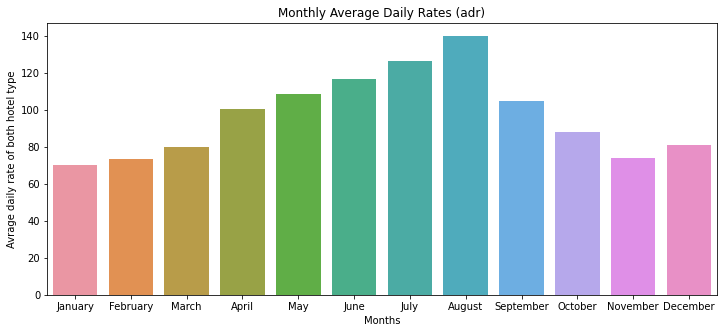

In [ ]:
# here we Visualizing the results of months adr by using bar plot
plt.figure(figsize=(12,5))
sns.barplot(x="arrival_date_month",y="adr",data=monthly_adr)
plt.xlabel('Months')
plt.ylabel('Avrage daily rate of both hotel type')
plt.title('Monthly Average Daily Rates (adr)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


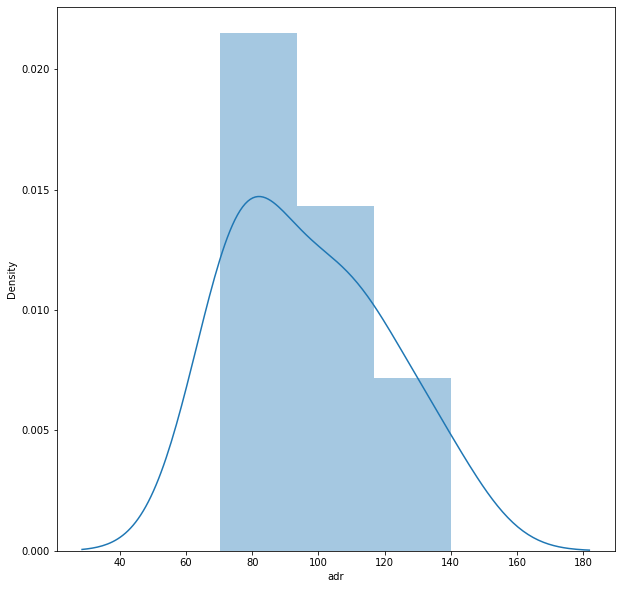

In [ ]:
# here we observing the density of adr by month
sns.distplot(monthly_adr['adr']);

As we can see, the highest average daily rate (ADR) has occurred in August. It means both hotels are generating more adr in August and in January, rooms are more available due to the lowest average daily rate.

Q-3 How does the ADR Vary Over the Year by Hotel Type ?

In [ ]:
# here we grouping all the values by arrival month and take average adr from resort hotel
Resort_hotel_adr_by_month = Resort_hotel.groupby('arrival_date_month')['adr'].mean().reset_index()

In [ ]:
# here we encoding the months by numeric months and creating new column 
Resort_hotel_adr_by_month['month_by_no'] = Resort_hotel_adr_by_month['arrival_date_month'].apply(lambda x :encoding_months_by_num(x))

In [ ]:
# here we sort the values by numeric months 
Resort_hotel_adr_by_month.sort_values(by='month_by_no',inplace=True)

In [ ]:
Resort_hotel_adr_by_month

,arrival_date_month,adr,month_by_no
4,January,49.461883,1
3,February,55.171930,2
7,March,57.520147,3
0,April,77.849496,4
8,May,78.758134,5
6,June,110.444749,6
5,July,155.181299,7
1,August,186.790574,8
11,September,93.252030,9
10,October,62.097617,10


In [ ]:
# here we grouping all the values by arrival month and take average adr from city hotel
City_hotel_adr_by_month = City_hotel.groupby('arrival_date_month')['adr'].mean().reset_index()

In [ ]:
# here we encoding the months by numeric months and creating new column 
City_hotel_adr_by_month['month_by_no'] = City_hotel_adr_by_month['arrival_date_month'].apply(lambda x :encoding_months_by_num(x))

In [ ]:
# here we sort the values by numeric months 
City_hotel_adr_by_month.sort_values(by='month_by_no',inplace=True)

In [ ]:
City_hotel_adr_by_month

,arrival_date_month,adr,month_by_no
4,January,82.628986,1
3,February,85.088278,2
7,March,91.822712,3
0,April,111.251838,4
8,May,121.638560,5
6,June,119.074341,6
5,July,110.734292,7
1,August,114.680455,8
11,September,110.004661,9
10,October,99.974498,10


In [ ]:
# here we concatenate the resort hotel adr and city hotel adr with arrival month
adr_by_hotel_type = pd.concat([Resort_hotel_adr_by_month['arrival_date_month'],Resort_hotel_adr_by_month['adr'],City_hotel_adr_by_month['adr']],axis=1)

In [ ]:
# here we renaming the columns
adr_by_hotel_type.columns = ['Month','Resort Hotel adr','City Hotel adr']

In [ ]:
adr_by_hotel_type

,Month,Resort Hotel adr,City Hotel adr
4,January,49.461883,82.628986
3,February,55.171930,85.088278
7,March,57.520147,91.822712
0,April,77.849496,111.251838
8,May,78.758134,121.638560
6,June,110.444749,119.074341
5,July,155.181299,110.734292
1,August,186.790574,114.680455
11,September,93.252030,110.004661
10,October,62.097617,99.974498


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


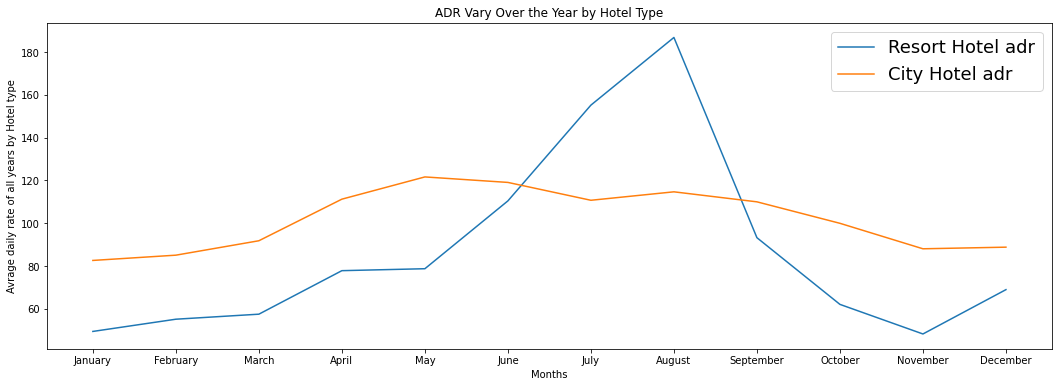

In [ ]:
# here we Visualizing the results of hotel type adr by month using line plot
plt.figure(figsize=(18,6))
sns.lineplot(adr_by_hotel_type['Month'],adr_by_hotel_type['Resort Hotel adr'])
sns.lineplot(adr_by_hotel_type['Month'],adr_by_hotel_type['City Hotel adr'])
plt.legend(labels=['Resort Hotel adr','City Hotel adr'], fontsize=18)
plt.xlabel('Months')
plt.ylabel('Avrage daily rate of all years by Hotel type')
plt.title('ADR Vary Over the Year by Hotel Type')
plt.show()

At the Resort Hotel, rooms are more demanding during July & August, and for the City Hotel, rooms are more demanding during April,May & June.
Also, over the years, city hotels have been more consistent than resort hotel in generating adr. 

Q-4 Find out the Relationship between Average Daily Rate(ADR) and Arrival Month by Booking Cancellation Status ?

In [ ]:
# here we grouping all the values by is_canceled & arrival month and take the average adr
canceled_adr = hotel_df_copy.groupby(['is_canceled','arrival_date_month'])['adr'].mean()

In [ ]:
# here we drop the non canceled data from canceled_adr
canceled_adr.drop(0,axis=0,inplace=True)

In [ ]:
# here we reset the index 
canceled_adr=canceled_adr.reset_index()

In [ ]:
# here we renaming the columns 
canceled_adr.columns = ['canceled','month','adr']

In [ ]:
canceled_adr

,canceled,month,adr
0,1,April,104.012931
1,1,August,136.851420
2,1,December,85.086972
3,1,February,75.899343
4,1,January,78.026270
5,1,July,122.670291
6,1,June,119.613028
7,1,March,86.062233
8,1,May,114.556427
9,1,November,81.038087


In [ ]:
# here we encoding the months by numeric months and creating new column 
canceled_adr['month_by_no'] = canceled_adr['month'].apply(lambda x :encoding_months_by_num(x))

In [ ]:
# here we sort the values by numeric months 
canceled_adr.sort_values(by='month_by_no',inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


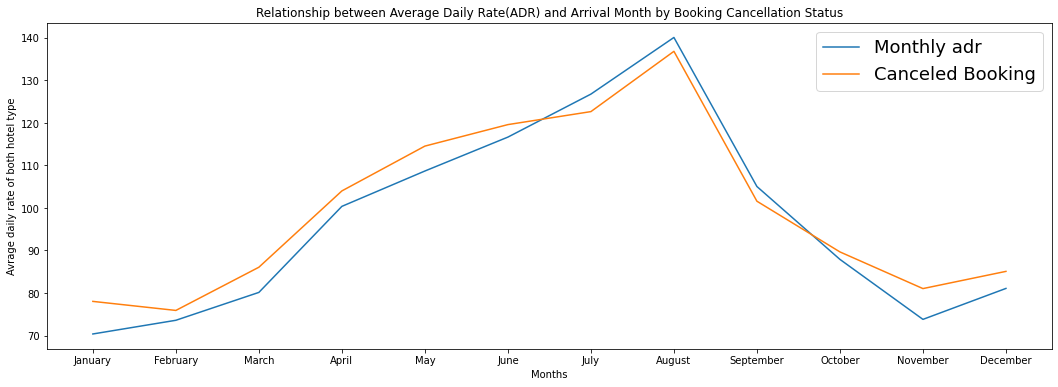

In [ ]:
# here we Visualizing the results of canceled booing by monthly adr using line plot
plt.figure(figsize=(18,6))
sns.lineplot(monthly_adr['arrival_date_month'],monthly_adr['adr'])
sns.lineplot(canceled_adr['month'],canceled_adr['adr'])
plt.legend(labels=['Monthly adr','Canceled Booking'], fontsize=18)
plt.xlabel('Months')
plt.ylabel('Avrage daily rate of both hotel type')
plt.title('Relationship between Average Daily Rate(ADR) and Arrival Month by Booking Cancellation Status')
plt.show()

The highest Average Daily Rate (ADR) has occurred in August and, due to the highest ADR in August, rooms are more demanding and unavailable is also one of the reasons for more cancelations in August.

Conclusion :-

* As we can see over the years, the average daily rate has increased in both hotels.
The city hotel is generating more adr than the resort hotel, but in 2015 the resort hotel is slightly ahead compared to the city hotel.

* As we can see, the highest average daily rate (ADR) has occurred in August. It means both hotels are generating more adr in August and in January, rooms are more available due to the lowest average daily rate.

* At the Resort Hotel, rooms are more demanding during July & August, and for the City Hotel, rooms are more demanding during April,May & June.
Also, over the years, city hotels have been more consistent than resort hotel in generating adr. 

* The highest Average Daily Rate (ADR) has occurred in August and, due to the highest ADR in August, rooms are more demanding and unavailable is also one of the reasons for more cancelations in August.


# Conclusion :-

* Shyam Shubham Mishra -> Examining the guest distribution
  * From the above bar plot we find that both the City Hotel & Resort Hotel are attracting 'Transient' type of customers the most followed by 'Transiet-Party' type. Whereas, 'Group' type of customers are the least attended by both the hotels.
  * From the above dataframe which represents the total number of repeated guests in both the hotels, we conclude that 'Transient' type of customers are most repeated in both the hotels, 'Contract' type customers being the least repeated.
  * The hotels are attending most guests from PTR followed by GBR & FRA.
  * Here we conclude that 'Transient' type customers are making the most changes in bookings, whereas 'Group' type customers are making the least changes in bookings.

* Nisha kumari -> Exploring the bookings
  * From result We can conclude here number of Booking and cancellation are more in city hotel than resort hotel.
  * As a result we can see more than 60% of the people booked from the City Hotel compared to Resort Hotel.
  * We can find the conclusion from the daigram the highest segment from where the booking and cancellation done are Online TA .
  * From result we can extract the higher channels from where the bookings and cancellation done is TA/TO from City Hotel.

* Mohd Firoz Chaudhri -> Inspecting the hotel traffic
  * Most busy year is 2016 followed by 2017 and 2015
  * Most busy month of city hotel is August and Most busy month of resort hotel is also August.
  * Most guest are coming from PRT country in Resort hotel
  * Most guest are coming from PRT country in city hotel.
  * Maximum number of stays in Resort hotel followed by city hotel.
  * maximum number of stays in weekened nights in Resort hotel followed by city hotel.

* Ishan Singh -> Examining special requests and amenities
  * In both City Hotel and Resort hotel type 1 special requests are the most cancelled, whereas type 5 are the least cancelled.
  * In city hotel, most special requests are coming from transient and transient party type of customers.
  * In both the hotels BB meal is preferred most by the guests followed by SC & HB.
  * Transient type of customers are requiring car parking the most followed by Transient Party type of customers.

* Hiten Mewada -> Study on Average Daily Rates (ADR)
  * As we can see over the years, the average daily rate has increased in both hotels.
The city hotel is generating more adr than the resort hotel, but in 2015 the resort hotel is slightly ahead compared to the city hotel.

  * As we can see, the highest average daily rate (ADR) has occurred in August. It means both hotels are generating more adr in August and in January, rooms are more available due to the lowest average daily rate.

  * At the Resort Hotel, rooms are more demanding during July & August, and for the City Hotel, rooms are more demanding during April,May & June.
Also, over the years, city hotels have been more consistent than resort hotel in generating adr. 

  * The highest Average Daily Rate (ADR) has occurred in August and, due to the highest ADR in August, rooms are more demanding and unavailable is also one of the reasons for more cancelations in August.
